In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
scaler=StandardScaler()
dataScaled=scaler.fit_transform(data)

In [4]:
#pd.DataFrame(dataScaled)

In [5]:
km=KMeans(n_clusters=3,random_state=10)
predictedClusters=km.fit_predict(dataScaled)
predictedClusters

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2,

In [8]:
km=KMeans(n_clusters=3,random_state=10)
km.fit(dataScaled)

KMeans(n_clusters=3, random_state=10)

In [6]:
data["pred_clusters"]=predictedClusters
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,pred_clusters
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,2


In [7]:
data["pred_clusters"].value_counts()

1    296
2    130
0     14
Name: pred_clusters, dtype: int64

In [15]:
sse=[]
for cluster in range(1,20):
    kmeans=KMeans(n_clusters=cluster)
    kmeans.fit(dataScaled)
    sse.append(kmeans.inertia_)

In [16]:
sse

[3520.0,
 2599.3844237836256,
 2147.6785841630854,
 1847.39935073682,
 1548.8659343652673,
 1313.961987424017,
 1173.010555107871,
 1050.6671364325684,
 998.764607341142,
 919.7605624874715,
 868.1130441712529,
 791.528795055324,
 765.56914412388,
 722.0608969988532,
 682.7457558772473,
 661.8275625911751,
 634.8904601171532,
 597.6597649888062,
 586.9154213994615]

Text(0, 0.5, 'wcss')

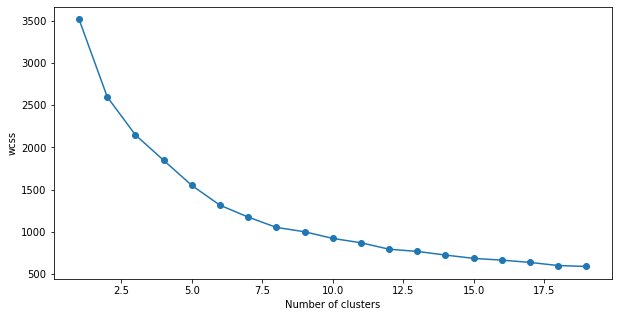

In [21]:
frame=pd.DataFrame({'Cluster':range(1,20),'SSE':sse})
plt.figure(figsize=(10,5))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("wcss")